# Titanic "guess who survived" (kaggle)

## Check out data

In [1]:
# data analysis and wrangling
import pandas as pd
import os

# visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
TITANIC_PATH = os.path.join("datasets", "titanic")

def load_titanic_data(titanic_path=TITANIC_PATH):
    train_csv_path = os.path.join(titanic_path, "train.csv")
    test_csv_path = os.path.join(titanic_path, "test.csv")
    return pd.read_csv(train_csv_path), pd.read_csv(test_csv_path)

train_df, test_df = load_titanic_data()
combine = [train_df, test_df]

__Insights__
- On April 15, 1912, during her maiden voyage, the Titanic sank after colliding with an iceberg, killing 1502 out of 2224 passengers and crew. Translated __32% survival rate__.
<br>

- One of the reasons that the shipwreck led to such loss of life was that there were __not enough lifeboats__ for the passengers and crew.
<br>

- Although there was some element of luck involved in surviving the sinking, some groups of people were more likely to survive than others, such as __women, children, and the upper-class__.

In [3]:
print(train_df.columns.values)
train_df.head()

['PassengerId' 'Survived' 'Pclass' 'Name' 'Sex' 'Age' 'SibSp' 'Parch'
 'Ticket' 'Fare' 'Cabin' 'Embarked']


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
train_df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


__Keys:__
- __Survived:__ that's the target, 0 means the passenger did not survive, while 1 means he/she survived.
- __Pclass:__ passenger class.
- __Name, Sex, Age:__ self-explanatory
- __SibSp:__ how many siblings & spouses of the passenger aboard the Titanic.
- __Parch:__ how many children & parents of the passenger aboard the Titanic.
- __Ticket:__ ticket id
- __Fare:__ price paid (in pounds)
- __Cabin:__ passenger's cabin number
- __Embarked:__ where the passenger embarked the Titanic
>- C=Cherbourg
>- Q=Queenstown
>- S=Southampton

In [5]:
train_df.describe(include=['O']) # non numerical values

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Olsvigen, Mr. Thor Anderson",male,CA. 2343,C23 C25 C27,S
freq,1,577,7,4,644


In [6]:
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [7]:
train_df["Survived"].value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [8]:
train_df["Parch"].value_counts()

0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64

In [9]:
train_df["Pclass"].value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

In [10]:
train_df["Sex"].value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [11]:
train_df["Embarked"].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

__Categorical and Ordinal Features__
<br>
- categorical:
> - Survived (0=dead or 1=survived)
> - Sex (male or female)
> - Embarked (S,C,Q etc)
- ordinal: Pclass ie. 1>2>3

__Numerical Features__
<br>
- continuous: Age, Fare
- discrete: SibSp, Parch

__Mixed data Features__
<br>
- Ticket: mix of alphanumeric and numerc data
- Cabin: alphanumerc

__Features that can contain errors and typos__
<br>
- Name: titles, short names, round brackets

In [12]:
train_df.info()
print('-'*40)
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
----------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Passenger

__Features that contains NaN values__
<br>
- __Age:__ 20% of sample are empty, either remove or fill
- __Cabin:__ > 77% of cabin are emty therefore we may ignore/remove this
- __Embarked:__ 0.33% of sample are empty, it is likely these will be removed

__Other insights__
<br>
- train sample is 40% of total passengers on board
- 38% of the train sample survived representative of the actual 32% (accuracy will be a reasonable metrics to evaluate the model)
- greater than 75% boarded without children or parents
- greater than 50% of the sample are 3rd class
- 65% of the test sample are male
- average fare was at £32.20
- average age was at 30 yrs

__Conlusion__
<br>
- train set has 7 integer features, test set has 6
- 5 features are strings (object)

### Assumptions from analysis
__Correaltions__
<br>
- Age v survival *
- Class v survival *
- Sex v survival *
- Fare v survival

## Prepare data for ML algorithms

In [13]:
from sklearn.base import BaseEstimator, TransformerMixin

class DataFrameSelector(BaseEstimator, TransformerMixin):
    def __init__(self, attribute_names):
        self.attribute_names = attribute_names
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        return X[self.attribute_names]

In [14]:
# imputer for numerical values
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

num_pipeline = Pipeline([
    ("select_numeric", DataFrameSelector(["Age", "SibSp", "Parch", "Fare"])),
    ("imputer", SimpleImputer(strategy="median")),
])

In [15]:
num_pipeline.fit_transform(train_df)

array([[22.    ,  1.    ,  0.    ,  7.25  ],
       [38.    ,  1.    ,  0.    , 71.2833],
       [26.    ,  0.    ,  0.    ,  7.925 ],
       ...,
       [28.    ,  1.    ,  2.    , 23.45  ],
       [26.    ,  0.    ,  0.    , 30.    ],
       [32.    ,  0.    ,  0.    ,  7.75  ]])

In [16]:
class MostFrequentImputer(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        self.most_frequent_ = pd.Series([X[c].value_counts().index[0] for c in X],
                                       index=X.columns)
        return self
    def transform(self, X, y=None):
        return X.fillna(self.most_frequent_)

In [17]:
#imputer for non numerical values
from sklearn.preprocessing import OneHotEncoder

cat_pipeline = Pipeline([
    ("select_cat", DataFrameSelector(["Pclass", "Sex", "Embarked"])),
    ("imputer", MostFrequentImputer()),
    ("cat_encoder", OneHotEncoder(sparse=False))
])

In [18]:
cat_pipeline.fit_transform(train_df)

array([[0., 0., 1., ..., 0., 0., 1.],
       [1., 0., 0., ..., 1., 0., 0.],
       [0., 0., 1., ..., 0., 0., 1.],
       ...,
       [0., 0., 1., ..., 0., 0., 1.],
       [1., 0., 0., ..., 1., 0., 0.],
       [0., 0., 1., ..., 0., 1., 0.]])

In [19]:
# join numerical and categorical pieplines
from sklearn.pipeline import FeatureUnion
preprocess_pipeline = FeatureUnion(transformer_list=[
    ("num_pipeline", num_pipeline),
    ("cat_pipline", cat_pipeline)
])

In [20]:
X_train = preprocess_pipeline.fit_transform(train_df)
X_train

array([[22.,  1.,  0., ...,  0.,  0.,  1.],
       [38.,  1.,  0., ...,  1.,  0.,  0.],
       [26.,  0.,  0., ...,  0.,  0.,  1.],
       ...,
       [28.,  1.,  2., ...,  0.,  0.,  1.],
       [26.,  0.,  0., ...,  1.,  0.,  0.],
       [32.,  0.,  0., ...,  0.,  1.,  0.]])

In [21]:
y_train = train_df["Survived"] # labels

## Testing an ML algorithm

In [22]:
# machine learning
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score

In [23]:
X_test = preprocess_pipeline.transform(test_df)

In [24]:
# logistic regression
log_reg_clf = LogisticRegression()
log_reg_clf.fit(X_train, y_train)
y_pred_log_reg = log_reg_clf.predict(X_test)

C:\Users\JEFFf\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [25]:
# cross val score
log_reg_scores = cross_val_score(log_reg_clf, X_train, y_train, cv=10)
log_reg_scores.mean()

C:\Users\JEFFf\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\JEFFf\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-reg

0.7980024968789013

In [26]:
# score
acc_log_reg = log_reg_clf.score(X_train,y_train)
acc_log_reg

0.8058361391694725

In [27]:
# SVC
svm_clf = SVC(gamma="auto")
svm_clf.fit(X_train,y_train)
y_pred_svm = svm_clf.predict(X_test)

In [28]:
# cross_val_score
svm_scores = cross_val_score(svm_clf, X_train, y_train, cv=10)
svm_scores.mean()

0.7329588014981274

In [29]:
# score
acc_svm = svm_clf.score(X_train, y_train)
acc_svm

0.8877665544332211

In [30]:
# linear SVC
lin_svm_clf = LinearSVC()
lin_svm_clf.fit(X_train, y_train)
y_pred_lin_svm = lin_svm_clf.predict(X_test)

C:\Users\JEFFf\Anaconda3\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [31]:
# cross_val_score
lin_svm_scores = cross_val_score(lin_svm_clf, X_train, y_train, cv=10)
lin_svm_scores.mean()

C:\Users\JEFFf\Anaconda3\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\JEFFf\Anaconda3\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\JEFFf\Anaconda3\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\JEFFf\Anaconda3\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\JEFFf\Anaconda3\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iteration

0.7395505617977529

In [32]:
# score
acc_lin_svm = lin_svm_clf.score(X_train, y_train)
acc_lin_svm

0.7687991021324355

In [33]:
# random forest
forest_clf = RandomForestClassifier(n_estimators=100, random_state=42)
forest_clf.fit(X_train, y_train)
y_pred_forest = forest_clf.predict(X_test)

In [34]:
# cross_val_score
forest_scores = cross_val_score(forest_clf, X_train, y_train, cv=10)
forest_scores.mean()

0.8126466916354558

In [35]:
# score
acc_forest = forest_clf.score(X_train, y_train)
acc_forest

0.9797979797979798

In [36]:
# KNeighbor
knn_clf = KNeighborsClassifier(n_neighbors = 3)
knn_clf.fit(X_train,y_train)
y_pred_knn = knn_clf.predict(X_test)

In [37]:
# cross_val_score
knn_scores = cross_val_score(knn_clf, X_train, y_train, cv=10)
knn_scores.mean()

0.7228464419475655

In [38]:
# score
acc_knn = knn_clf.score(X_train, y_train)
acc_knn

0.8417508417508418

In [39]:
# Gaussian Naive Bayes
gaussian_clf = GaussianNB()
gaussian_clf.fit(X_train,y_train)
y_pred_gaussian = gaussian_clf.predict(X_test)

In [40]:
# cross_val_score
gaussian_scores = cross_val_score(gaussian_clf, X_train, y_train, cv=10)
gaussian_scores.mean()

0.7856803995006241

In [41]:
# score
acc_gaussian = gaussian_clf.score(X_train, y_train)
acc_gaussian

0.7867564534231201

In [42]:
# preceptron
perceptron_clf = Perceptron()
perceptron_clf.fit(X_train,y_train)
y_pred_perceptron = perceptron_clf.predict(X_test)

In [43]:
# cross_val_score
perceptron_scores = cross_val_score(perceptron_clf, X_train, y_train, cv=10)
perceptron_scores.mean()

0.7262172284644194

In [44]:
# score
acc_perceptron = perceptron_clf.score(X_train, y_train)
acc_perceptron

0.6846240179573513

In [45]:
# Stochasitic Gradient Descent
sgd_clf = SGDClassifier()
sgd_clf.fit(X_train,y_train)
y_pred_sgd = sgd_clf.predict(X_test)

In [46]:
# cross_val_score
sgd_scores = cross_val_score(sgd_clf, X_train, y_train, cv=10)
sgd_scores.mean()

0.7204619225967541

In [47]:
# score
acc_sgd = sgd_clf.score(X_train, y_train)
acc_sgd

0.792368125701459

In [48]:
# Decision tree
dec_tree_clf = DecisionTreeClassifier()
dec_tree_clf.fit(X_train,y_train)
y_pred_dec_tree = dec_tree_clf.predict(X_test)

In [49]:
# cross_val_score
dec_tree_scores = cross_val_score(dec_tree_clf, X_train, y_train, cv=10)
dec_tree_scores.mean()

0.7890012484394507

In [50]:
# score
acc_dec_tree = dec_tree_clf.score(X_train, y_train)
acc_dec_tree

0.9797979797979798

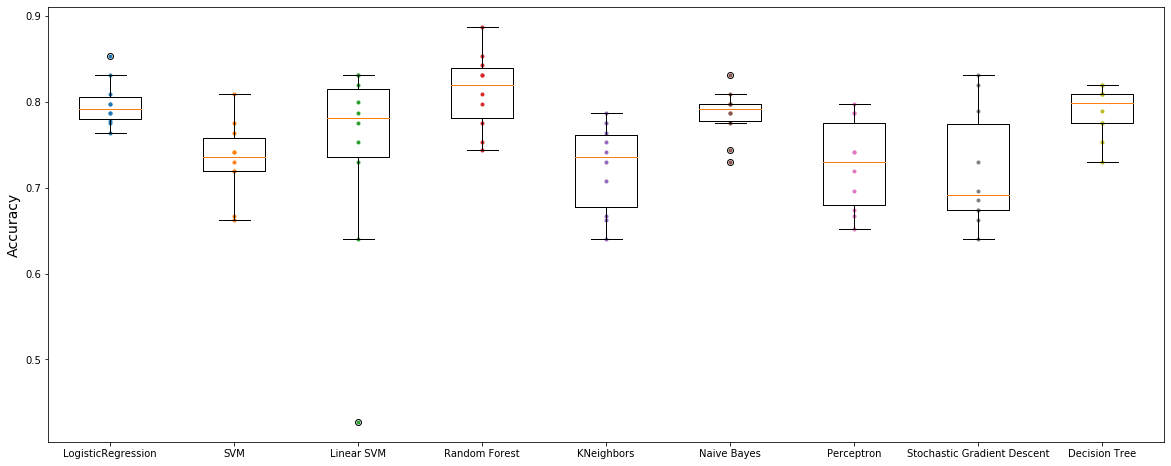

In [51]:
# cross_val_scores mean accuracy
plt.figure(figsize=(20, 8))
plt.plot([1]*10, log_reg_scores, ".")
plt.plot([2]*10, svm_scores, ".")
plt.plot([3]*10, lin_svm_scores, ".")
plt.plot([4]*10, forest_scores, ".")
plt.plot([5]*10, knn_scores, ".")
plt.plot([6]*10, gaussian_scores, ".")
plt.plot([7]*10, perceptron_scores, ".")
plt.plot([8]*10, sgd_scores, ".")
plt.plot([9]*10, dec_tree_scores, ".")
plt.boxplot(
    [
        log_reg_scores,
        svm_scores,
        lin_svm_scores,
        forest_scores,
        knn_scores,
        gaussian_scores,
        perceptron_scores,
        sgd_scores,
        dec_tree_scores
    ],
    labels=(
        "LogisticRegression",
        "SVM",
        "Linear SVM",
        "Random Forest",
        "KNeighbors",
        "Naive Bayes",
        "Perceptron",
        "Stochastic Gradient Descent",
        "Decision Tree"
    ))
plt.ylabel("Accuracy", fontsize=14)
plt.show()

In [52]:
# scores evaluation
models = pd.DataFrame({
    'Model': [
        "LogisticRegression",
        "SVM",
        "Linear SVM",
        "Random Forest",
        "KNeighbors",
        "Naive Bayes",
        "Perceptron",
        "Stochastic Gradient Descent",
        "Decision Tree"
    ],
    'Score': [
        acc_log_reg,
        acc_svm,
        acc_lin_svm,
        acc_forest,
        acc_knn,
        acc_gaussian,
        acc_perceptron,
        acc_sgd,
        acc_dec_tree
    ]})
models.sort_values(by='Score', ascending=False)

,Model,Score
3,Random Forest,0.979798
8,Decision Tree,0.979798
1,SVM,0.887767
4,KNeighbors,0.841751
0,LogisticRegression,0.805836
7,Stochastic Gradient Descent,0.792368
5,Naive Bayes,0.786756
2,Linear SVM,0.768799
6,Perceptron,0.684624


In [56]:
submission = pd.DataFrame({
        "PassengerId": test_df["PassengerId"],
        "Survived": y_pred_forest
    })
submission

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,1
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [60]:
# submit ideal ML model
submission.to_csv('./datasets/output/submission.csv', index=False)